### Objective
### This file determines the feature importance for dataframe df_4
### according to the first approach which is defined in README file.
### Five configurable AI models are fitted in df_4 and the best model (configured 
### for the best hyperparameter values amoing the experimented ones)
### is determined through gridsearchcv. 
### The coefficients of the best model (best among the experimented oned)
### determine the feature importance.

In [1]:
import pandas as pd
import numpy as np

#import it from the notebook
import import_ipynb
from  cc_fi_initializing_variables  import *
import cc_fi_fcts_data_treatment
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.cluster as cluster

import os


from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

import pickle

importing Jupyter notebook from cc_fi_initializing_variables.ipynb
importing Jupyter notebook from cc_fi_fcts_data_treatment.ipynb


## Examination feature importance,  dataframe df_4

In [2]:
#the name of the dataframe associated with variable val_name_data_1_for_pickle
#defined in file cc_fi_initializing_variables
val_name_data_1_for_pickle

'my_df_4.pkl'

In [3]:
#initialize variable v_dataframe_1 with value of variable 
#val_name_dataframe_1 initialized in file cc_fi_initializing_variables
v_dataframe_1=val_name_dataframe_1

#we load from the memory the dataframe val_name_data_1_for_pickle
#where was stored during the data treatment in file cc_fi_preparing_df.ipynb
#v_dataframe_1=df_4 
v_dataframe_1=pd.read_pickle(val_name_data_1_for_pickle)

#v_dataframe_1

In [4]:
#read DataFrame df_c from pickle file

#initialize variable v_dataframe_2 with valu eof variable 
#val_name_dataframe_1 initialized in file cc_fi_initializing_variables
v_dataframe_2=val_name_dataframe_2

#we load from the memory the dataframe val_name_data_2_for_pickle
#where was stored during the data treatment in file cc_fi_preparing_df.ipynb
v_dataframe_2=pd.read_pickle(val_name_data_2_for_pickle)

#v_dataframe_2

In [5]:

#columns of dataframe 1 (df_4)
v_feature_keys_1=v_dataframe_1.columns.tolist()


#columns of dataframe 2 (df_c)
v_feature_keys_2=v_dataframe_2.columns.tolist()

#name of each feature
v_titles=v_dataframe_1.columns.tolist()

#variable val_colors_for_feature_subplots is a 
#list with colors initialized in file 
#cc_fi_initializing_variables
v_colors=val_colors_for_feature_subplots





In [6]:
#print the first 5 rows of the dataframe
v_dataframe_1.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
32,29619.642857,27990,2012.0,25572.370087,27990.000000,22980.748306,25782.527539,17955.924836,68696.0,19171.763069,31638.333499,27990.0,22416.523430,28460.292528,20887.563147,24168.985770
33,29383.928571,34590,2016.0,21757.468406,33475.407166,22980.511705,19952.703691,17955.804661,29499.0,19171.652094,31637.786779,34590.0,22416.285343,28459.470610,15752.844154,24160.447607
35,29548.214286,29990,2016.0,21757.950435,28885.343629,22980.676609,19952.898408,17955.888420,17302.0,19171.729440,31638.167826,29990.0,22416.451282,28460.043462,21737.197640,24166.398448
36,29241.071429,38590,2011.0,21757.049251,38406.126374,22980.368310,25781.961269,17955.731828,30237.0,19171.584837,31637.455434,38590.0,22593.725220,29739.679051,21735.862444,24155.272962
38,29441.071429,32990,2017.0,22359.832294,29700.045455,22980.569063,19952.771419,17955.833795,30041.0,19171.678997,31637.919317,32990.0,22416.343061,29741.605435,15753.032345,24162.517464


In [7]:
#print the first 5 rows of the dataframe
v_dataframe_2.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
27,27192.910448,33590,2014.0,31131.718507,35232.105263,59280.728984,57923.0,65617.252593,28255.175242,42729.805087
28,27275.000000,22590,2010.0,23950.670750,20613.209181,59280.762350,71229.0,65617.281760,28255.360505,42732.280891
29,27148.134328,39590,2020.0,23950.345858,34380.810204,59280.710784,19160.0,65617.236683,28255.074189,42728.454648
30,27212.313433,30990,2017.0,245672.903654,34760.978593,59280.736871,41124.0,65617.259487,28255.219032,42730.390277
31,27331.641791,15000,2013.0,37421.667910,18868.563559,59280.785372,128000.0,65617.301885,65645.490178,42733.989196


In [8]:
#information on datframe v_dataframe_1
v_dataframe_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61005 entries, 32 to 426878
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        61005 non-null  float64
 1   price         61005 non-null  int64  
 2   year          61005 non-null  float64
 3   manufacturer  61005 non-null  float64
 4   model         61005 non-null  float64
 5   condition     61005 non-null  float64
 6   cylinders     61005 non-null  float64
 7   fuel          61005 non-null  float64
 8   odometer      61005 non-null  float64
 9   title_status  61005 non-null  float64
 10  transmission  61005 non-null  float64
 11  VIN           61005 non-null  float64
 12  drive         61005 non-null  float64
 13  type          61005 non-null  float64
 14  paint_color   61005 non-null  float64
 15  state         61005 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 7.9 MB


In [9]:
#information on datframe v_dataframe_2
v_dataframe_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389604 entries, 27 to 426879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  float64
 1   price         389604 non-null  int64  
 2   year          389604 non-null  float64
 3   manufacturer  389604 non-null  float64
 4   model         389604 non-null  float64
 5   fuel          389604 non-null  float64
 6   odometer      389604 non-null  float64
 7   title_status  389604 non-null  float64
 8   transmission  389604 non-null  float64
 9   state         389604 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 32.7 MB


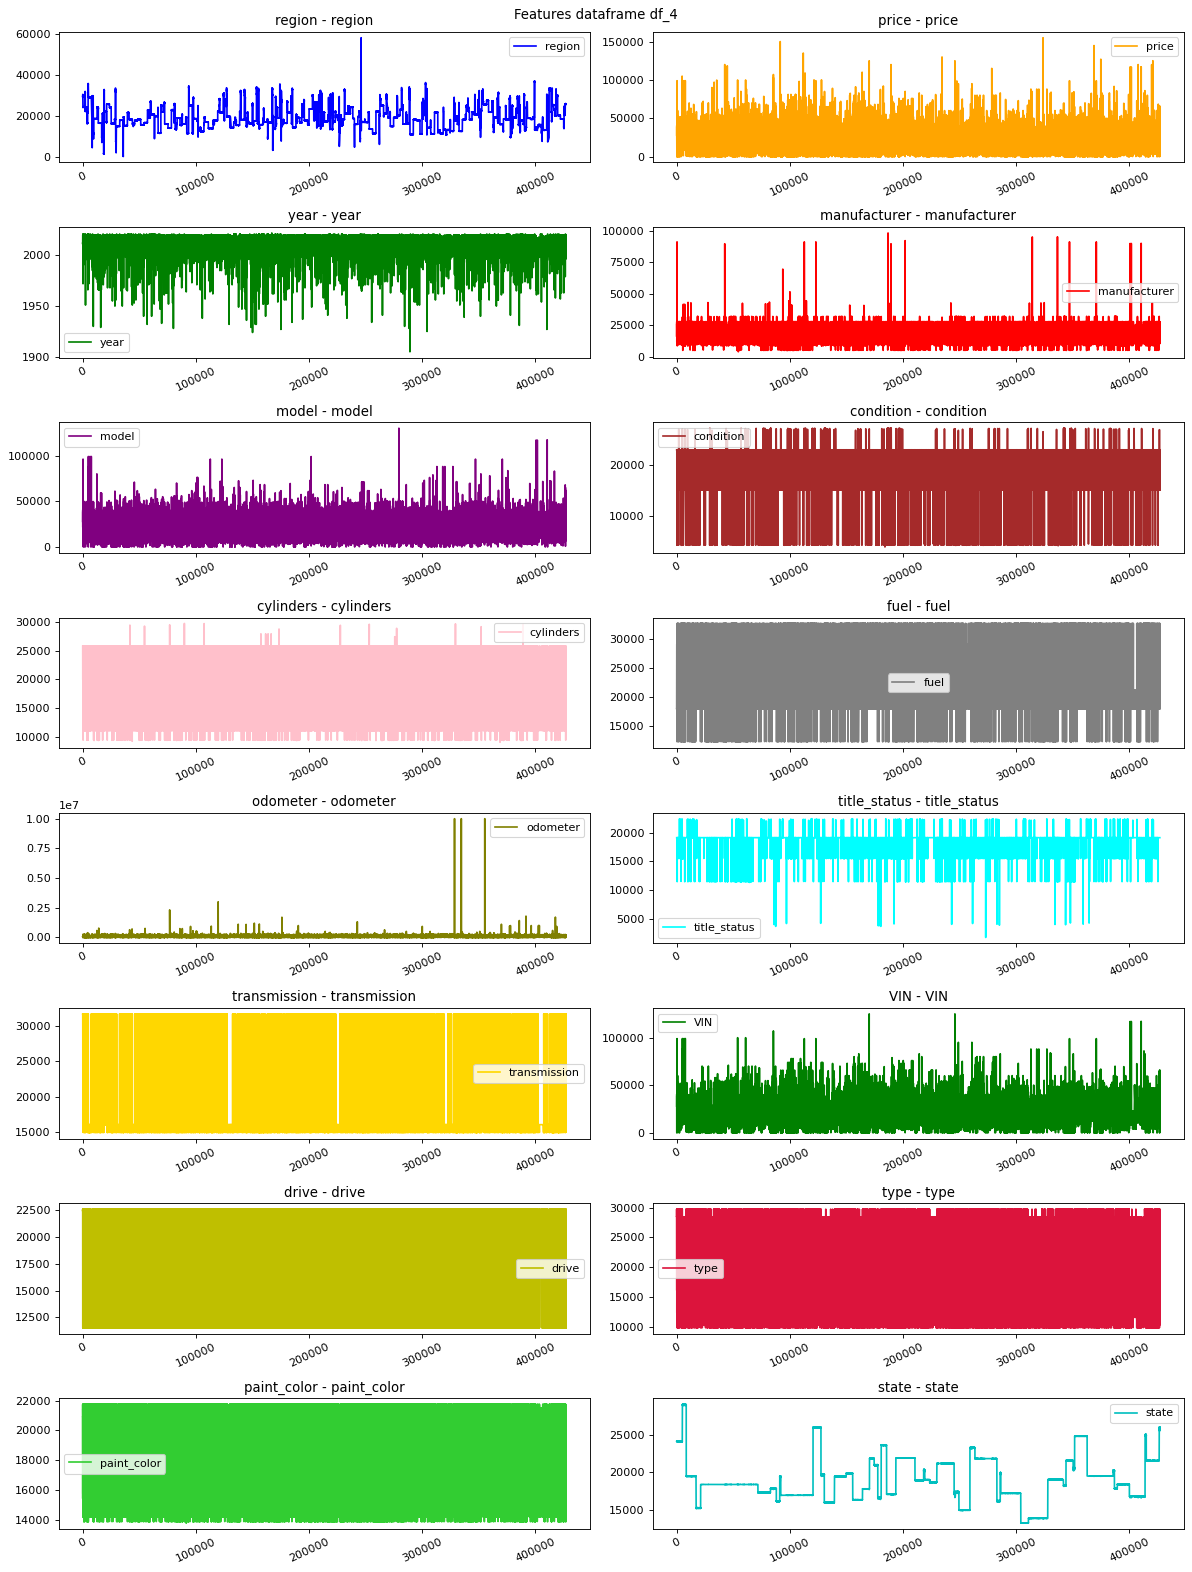

In [10]:
#plots of each feature of the v_dataframe_1 (df_4)
cc_fi_fcts_data_treatment.fct_show_raw_visualization(
    data=v_dataframe_1,
    feature_keys=v_feature_keys_1,
    titles=v_titles,
    colors=v_colors,\
    v_cols=v_cols_for_all_features_subplots,
    v_name_dataframe=val_name_dataframe_1)



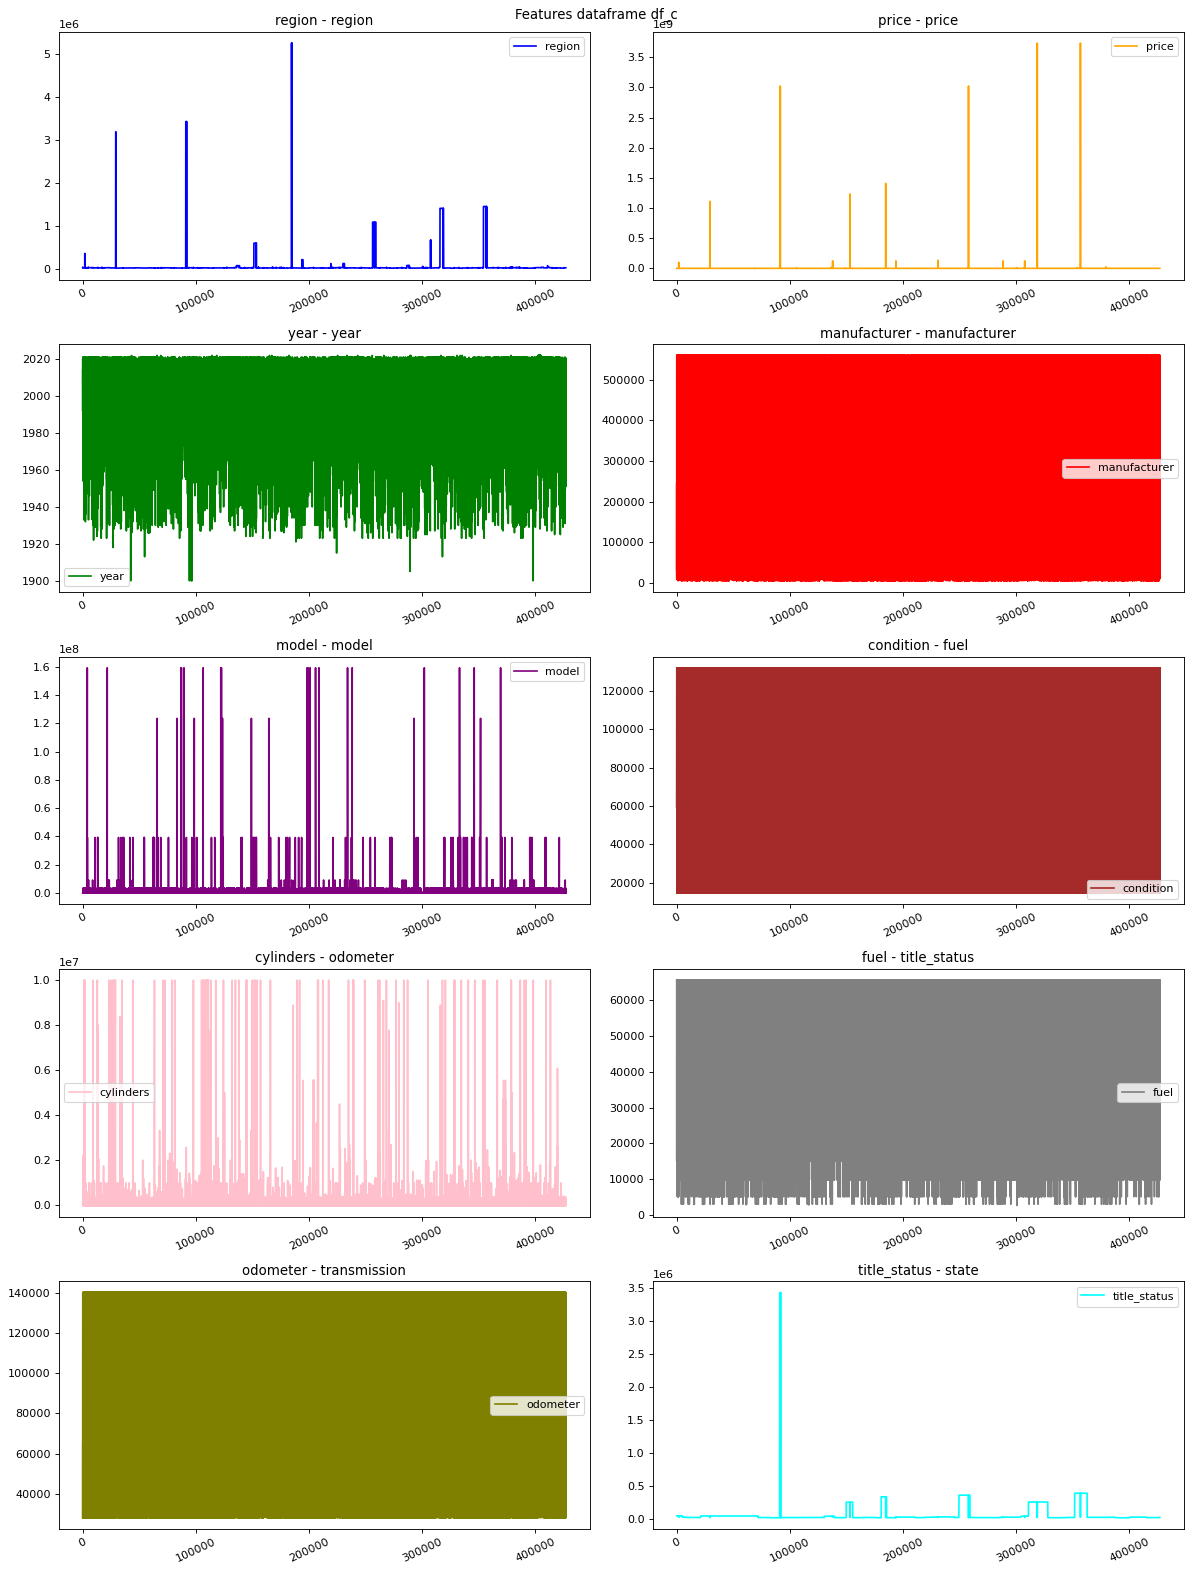

In [11]:
#plots of each feature of the v_dataframe_2 (df_c)
cc_fi_fcts_data_treatment.fct_show_raw_visualization(
    data=v_dataframe_2,
    feature_keys=v_feature_keys_2,
    titles=v_titles,
    colors=v_colors,\
    v_cols=v_cols_for_all_features_subplots,
    v_name_dataframe=val_name_dataframe_2)

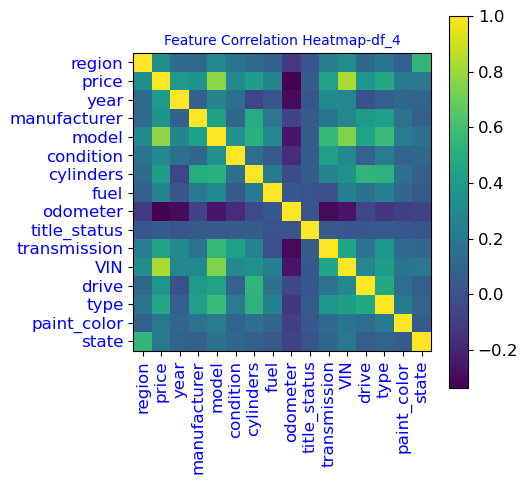

In [12]:
#plot of the feature heatmap for df_4
cc_fi_fcts_data_treatment.fct_show_feature_heatmap(\
data=v_dataframe_1,\
val_name_dataframe=val_name_dataframe_1)

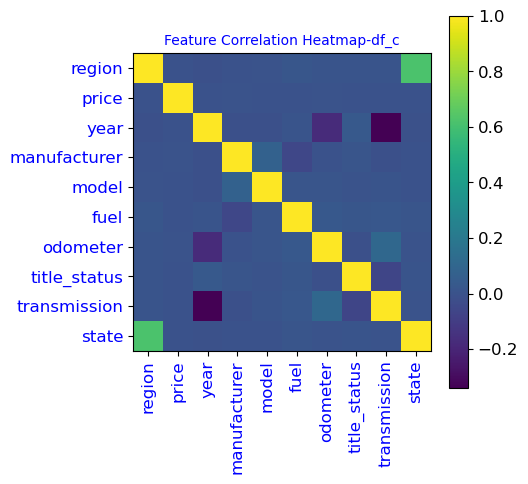

In [13]:
#plot of the feature heatmap for df_c
cc_fi_fcts_data_treatment.fct_show_feature_heatmap(\
data=v_dataframe_2,\
val_name_dataframe=val_name_dataframe_2)

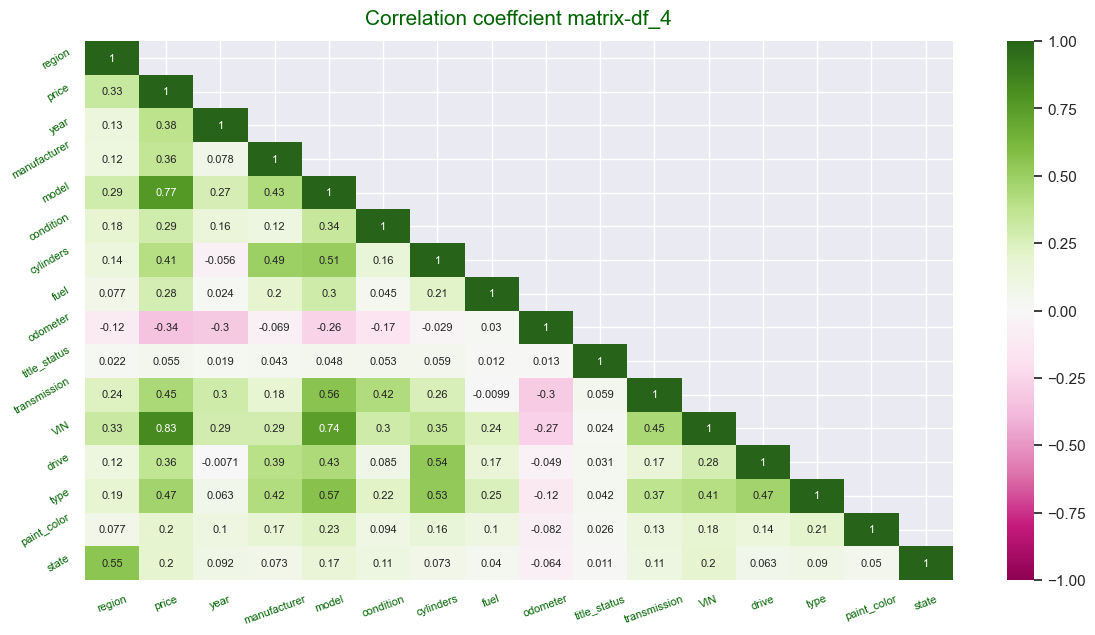

In [14]:
#plot of the correlation matrix for df_4
cc_fi_fcts_data_treatment.fct_show_cor_coef_matrix(\
val_data=v_dataframe_1,\
val_name_dataframe=val_name_dataframe_1)

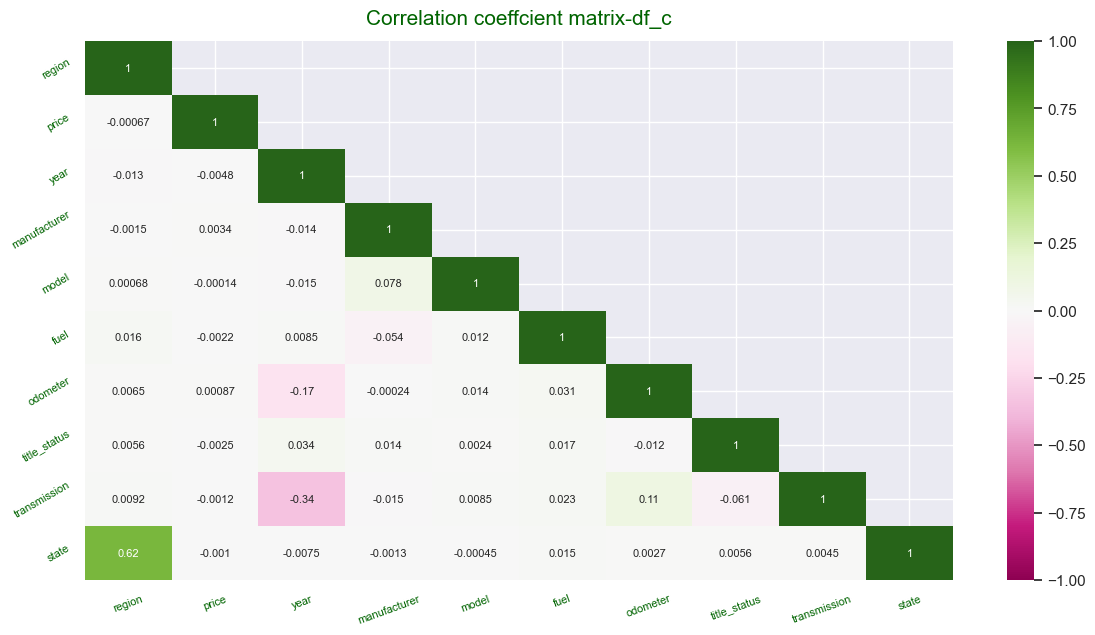

In [15]:
#plot of the correlation matrix for df_b
cc_fi_fcts_data_treatment.fct_show_cor_coef_matrix(\
val_data=v_dataframe_2,\
val_name_dataframe=val_name_dataframe_2)

In [16]:
#Creation of the feature set and target set for
#dataframe v_dataframe_1
X_1 = v_dataframe_1.drop('price', axis = 1)
y_1 = v_dataframe_1['price']


#Creation of the feature set and target set for
#dataframe v_dataframe_2
X_2 = v_dataframe_2.drop('price', axis = 1)
y_2 = v_dataframe_2['price']

# shuffle=True by default for train_test_split
#train, validation and test sets for v_dataframe_1 dataframe
X_train_1_a, X_test_1, y_train_1_a, y_test_1 =\
train_test_split(X_1, y_1, test_size=0.2, random_state=1)

X_train_1_b, X_val_1, y_train_1_b, y_val_1 =\
train_test_split(X_train_1_a, y_train_1_a, test_size=0.25, random_state=1)


#train, validation and test sets for v_dataframe_2 dataframe
#final train=X_train_2_b
#validation=X_val_2
X_train_2_a, X_test_2, y_train_2_a, y_test_2 =\
train_test_split(X_2, y_2, test_size=0.2, random_state=1)

X_train_2_b, X_val_2, y_train_2_b, y_val_2 =\
train_test_split(X_train_2_a, y_train_2_a, test_size=0.25, random_state=1)


### IT SHOULD BE ACCENTUATED THAT DIE TPO THE KFOLD CROSS VALIDATION
### THE ENTIRE DATASET SHOULD BE EMPLOYED (HERE X_1, y_1 OR X_2, y_2).
### HOWEVER THE TRAIN SET IS EUSED WHEN FITTING THE HRIDSEARCH OBJECT
##### IMPOSE TEHE NEED IF A RAPID IMPLEMENTATION
### AS WE PREFER TO MAINTAIN THIS NAUMBER AND VALUES OF THE HYPERPARAMETERS
### THE DATASET SIZE SHOULD BE REDUCED. CONSEQUENTLY X_train_1_a IS USED ANS SO ON

In [17]:
#pipeline with PolynomialFeatures feature creation 
#and Linear regression model
lin_regression_pipe=\
Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),\
('scaler', StandardScaler()),('model', LinearRegression(n_jobs=10000000))])


#pipeline with PolynomialFeatures feature creation 
#and Ridge regression model
ridge_pipe = Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),\
('scaler', StandardScaler()),('model', Ridge(max_iter=10000000))])


#pipeline with PolynomialFeatures feature creation 
#and Ridge regression model
lasso_pipe=Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),\
('scaler', StandardScaler()),\
('model',Lasso(random_state=42,max_iter=10000000) )])


#pipeline with PolynomialFeatures feature creation, 
#Lasso feature selector and Linear regression model
lasso_feature_selector_with_LR_model_pipe=\
Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),
('scaler', StandardScaler()),
('feature_selector_l1', SelectFromModel(Lasso(random_state = 42,max_iter=10000000))),
('model', LinearRegression(n_jobs=10000000))])

#pipeline with PolynomialFeatures feature creation, 
#Lasso feature selector and Ridge regression model
lasso_feature_selector_with_Ridge_model_pipe=\
Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),
('scaler', StandardScaler()),
('feature_selector_l2', SelectFromModel(Lasso(random_state=42,max_iter=10000000))),
('model', Ridge(max_iter=10000000))])


#pipeline with PolynomialFeatures feature creation, 
#Lasso feature selector and Lasso regression model
lasso_feature_selector_with_Lasso_model_pipe=\
Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),
('scaler', StandardScaler()),
('feature_selector_l3', SelectFromModel(Lasso(random_state=42,max_iter=10000000))),
('model', Lasso(random_state=42,max_iter=10000000))])


In [18]:
param_dict_lin_regression_pipe ={\
'estim':[lin_regression_pipe],\
'estim__poly_features__degree':[1,2],\
'estim__model__fit_intercept':[True,False]}


param_dict_ridge_pipe ={\
'estim':[ridge_pipe],\
'estim__poly_features__degree':[1,2,3],\
'estim__model__fit_intercept':[True,False],
'estim__model__alpha':[5,10,20]}#,7,10,15,20,25,30,50]}
#[0.05,0.6,1,7,20,50]

##'estim__model__alpha':[0.02,0.45,0.6,1,3,5,7,20]

param_dict_lasso_pipe={\
'estim':[lasso_pipe],\
'estim__poly_features__degree':[1,2,3],\
'estim__model__fit_intercept':[True,False],
'estim__model__alpha':[10,20,50]}#1,7,20]}
#[0.05,0.6,5]
#10 ok
#20 ok
#50 OK [1,2,3]

param_dict_lasso_feat_select_lr_estim_pipe={\
'estim':[lasso_feature_selector_with_LR_model_pipe],\
'estim__poly_features__degree':[1,2],\
'estim__feature_selector_l1__estimator__fit_intercept':[True,False],
'estim__feature_selector_l1__estimator__alpha':[5,10,20]}
#[0.05,0.6,5]

param_dict_lasso_feat_select_ridge_estim_pipe={\
'estim':[lasso_feature_selector_with_Ridge_model_pipe],\
'estim__poly_features__degree':[1,2],\
'estim__feature_selector_l2__estimator__fit_intercept':[True,False],\
'estim__feature_selector_l2__estimator__alpha':[5,7,10,20,30],\
'estim__model__alpha':[5,10,20,30]}



In [19]:
pipeline = Pipeline([('estim', lin_regression_pipe)])

#pipeline=Pipeline([('estim',ridge_pipe)])
#pipeline = Pipeline([('estim', lasso_feature_selector_with_Lasso_model_pipe)])
#params =[param_dict_ridge_pipe]
#params = [param_dict_lasso_feat_select_lasso_estim_pipe]

#liqt with the dictionaries witht he parameters for each pipeline
params = [param_dict_lin_regression_pipe,\
param_dict_ridge_pipe,\
param_dict_lasso_pipe,\
param_dict_lasso_feat_select_lr_estim_pipe,\
param_dict_lasso_feat_select_ridge_estim_pipe]
#,\
#param_dict_lasso_feat_select_lasso_estim_pipe]

          
#definition of the gridsearch object    
gs_obj=GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')   


In [20]:
#we use the train set to fit the gridsearch object 
#however, dies to 5-fold cross validation the entire dataset
#should be employed. Due to computer limitations
#and time cosntraints the train set was considered as full
#set due to its smaller size

gs_obj.fit(X_train_1_a,y_train_1_a)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estim',
                                        Pipeline(steps=[('poly_features',
                                                         PolynomialFeatures(include_bias=False)),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('model',
                                                         LinearRegression(n_jobs=10000000))]))]),
             param_grid=[{'estim': [Pipeline(steps=[('poly_features',
                                                     PolynomialFeatures(include_bias=False)),
                                                    ('scaler',
                                                     StandardScaler()),
                                                    ('model',
                                                     LinearRegressio...
                                                    ('feature_selector_l2',
                                                     SelectFromModel(estimator=Lasso(max_iter=10000000,
                                                                                     random_state=42))),
                                                    ('model',
                                                     Ridge(max_iter=10000000))])],
                          'estim__feature_selector_l2__estimator__alpha': [5, 7,
                                                                           10,
                                                                           20,
                                                                           30],
                          'estim__feature_selector_l2__estimator__fit_intercept': [True,
                                                                                   False],
                          'estim__model__alpha': [5, 10, 20, 30],
                          'estim__poly_features__degree': [1, 2]}],
             scoring='neg_mean_squared_error')

In [22]:
#save the gridsearch object in memory
with open("gs_obj.pkl", 'wb') as fp1:
    pickle.dump(gs_obj,fp1)

In [23]:
#the paremeters of the best model
gs_obj.best_params_

{'estim': Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', LinearRegression(n_jobs=10000000))]),
 'estim__model__fit_intercept': True,
 'estim__poly_features__degree': 2}

In [24]:
#the best model
best_model = gs_obj.best_estimator_
best_model

Pipeline(steps=[('estim',
                 Pipeline(steps=[('poly_features',
                                  PolynomialFeatures(include_bias=False)),
                                 ('scaler', StandardScaler()),
                                 ('model',
                                  LinearRegression(n_jobs=10000000))]))])

In [25]:
#gs_obj.best_estimator_.steps

In [26]:
#import sys
#sys.exit()

In [27]:
val_gridsearchcv_fit_object_0=gs_obj

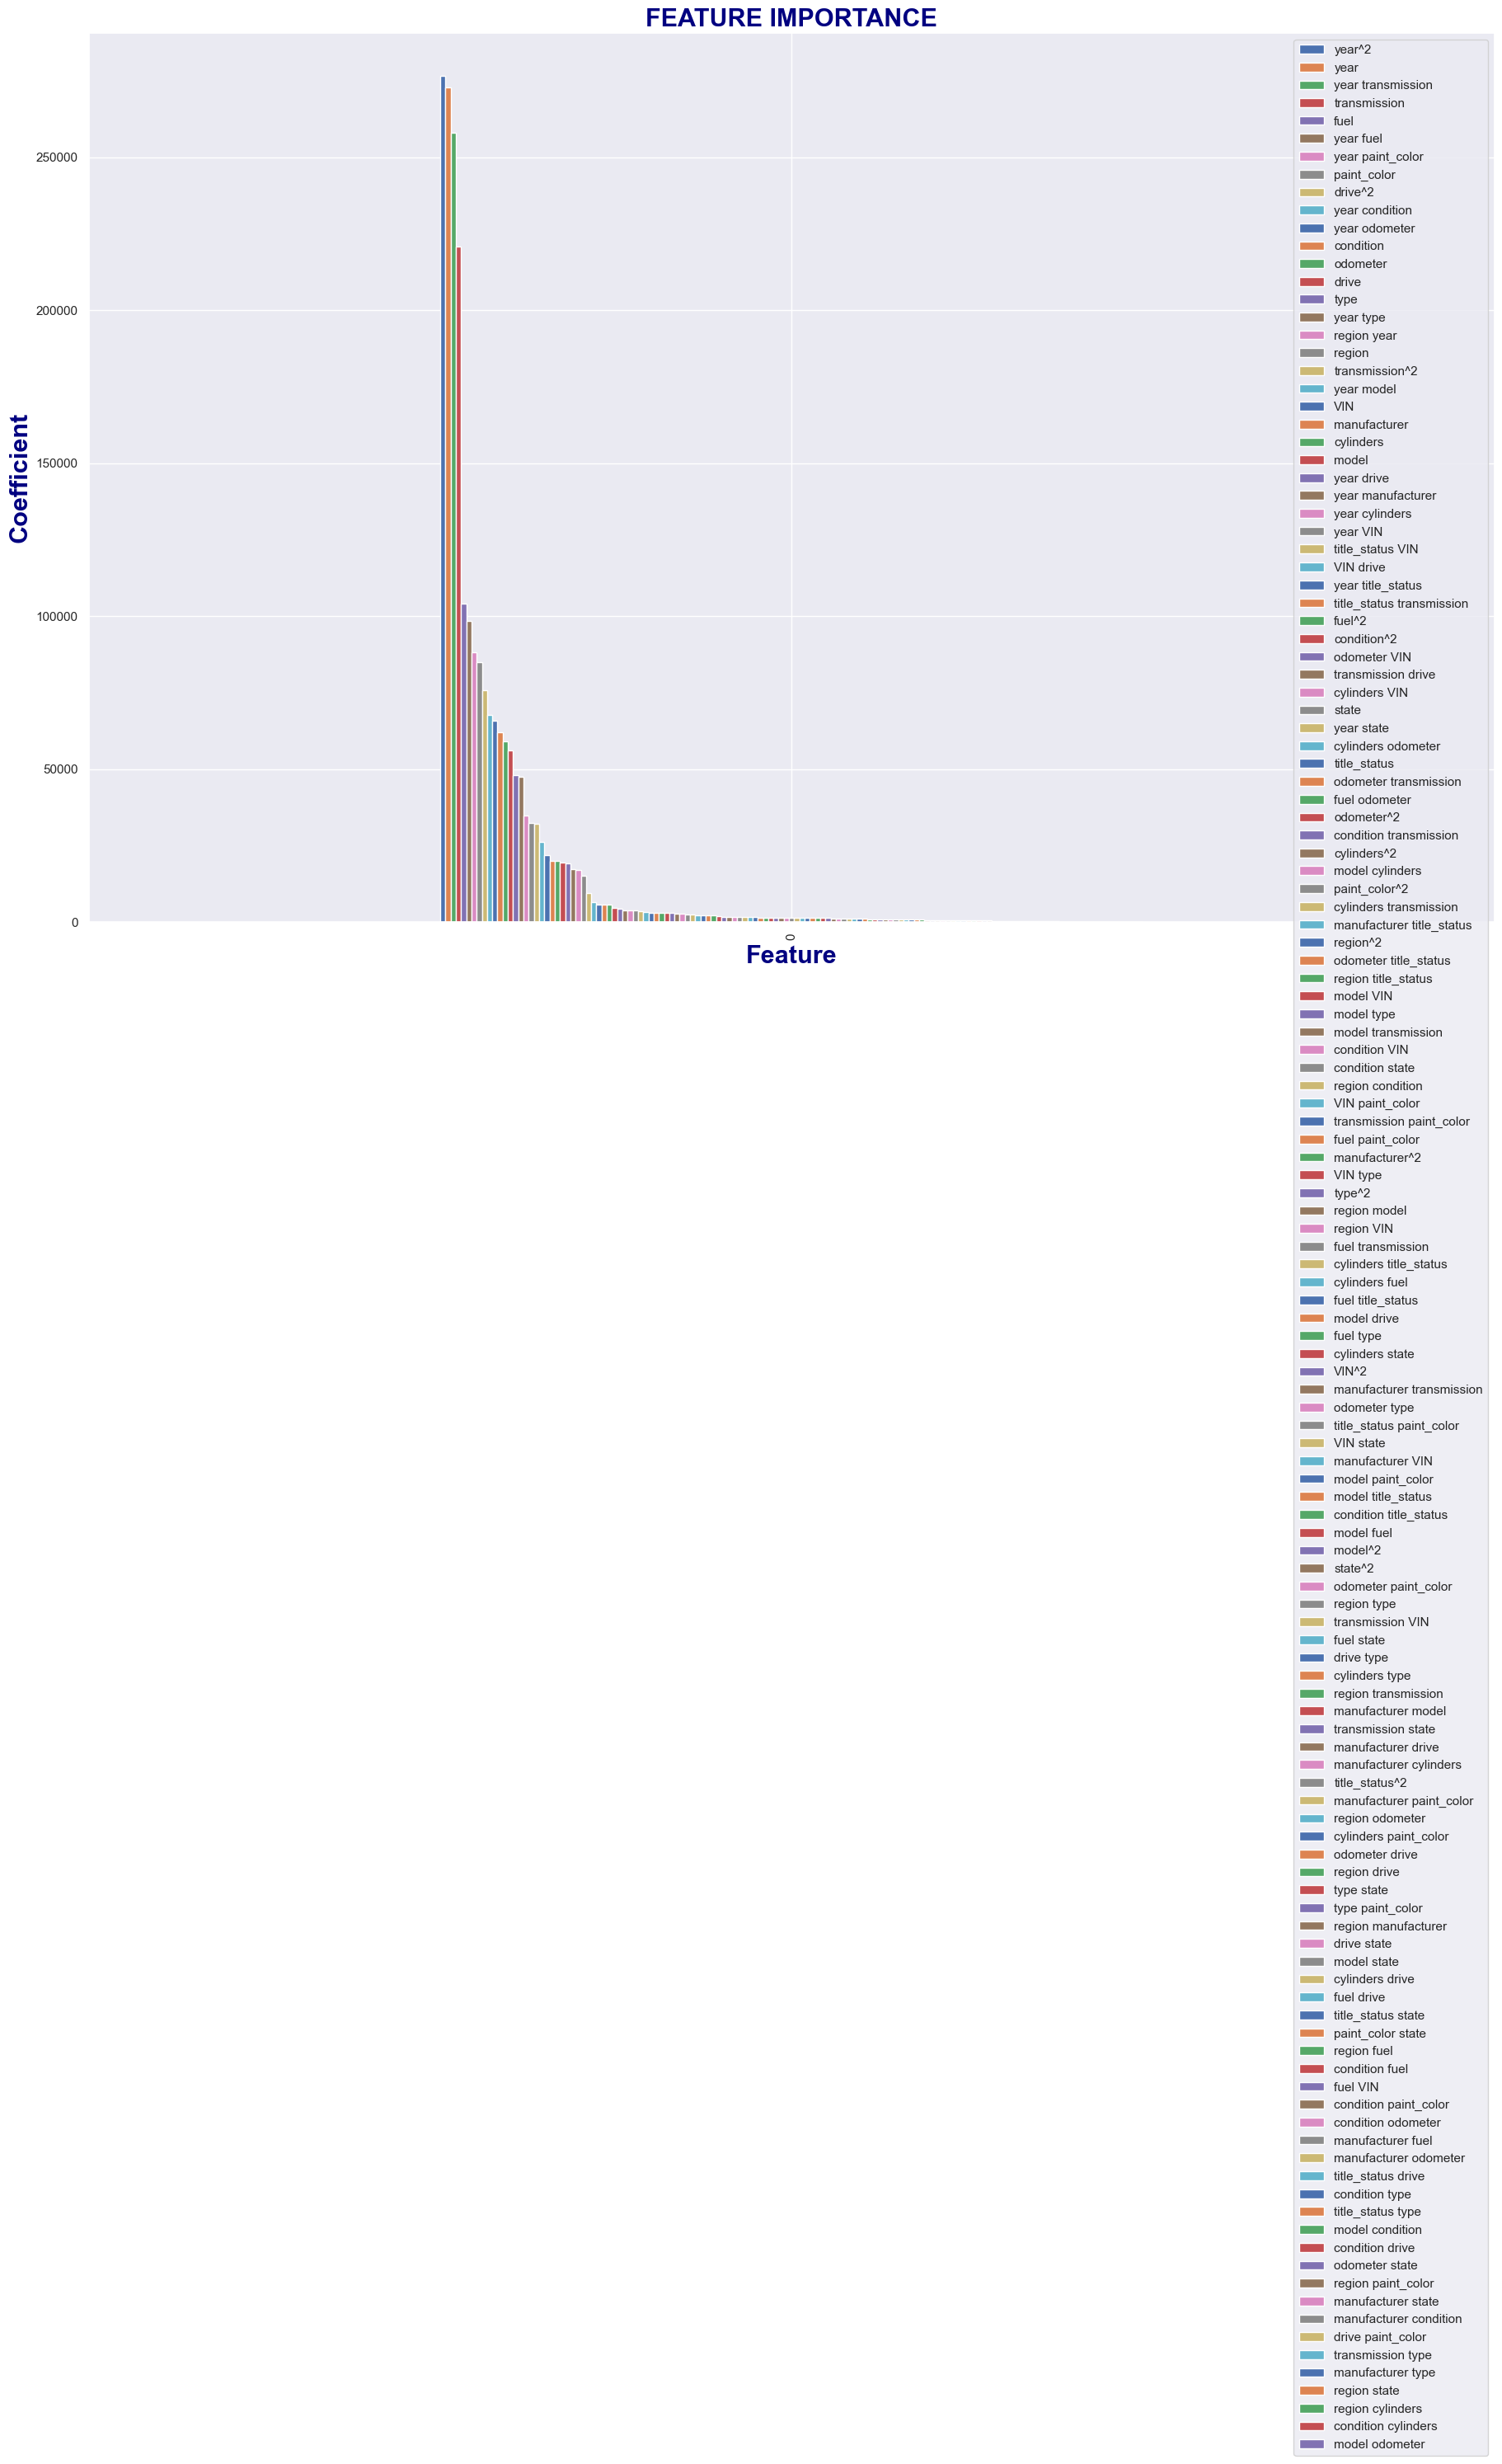

In [30]:
#barplot of the feature importance

#df_abs_sorted=sorted dataframe with the absolute values 
#of the (feature) coefficients in an decreasing order

#df_sorted= sorted dataframe with the values 
#of the (feature) coefficients in an decreasing order

df_abs_sorted,df_sorted=\
cc_fi_fcts_data_treatment.\
fct_plot_and_treat_coefficients_model_without_feature_selection(\
val_gridsearchcv_fit_object=val_gridsearchcv_fit_object_0,\
val_step_model="model",\
val_title_fig="FEATURE IMPORTANCE",\
val_xlabel_fig="Feature",\
val_ylabel_fig="Coefficient")

In [39]:
#the dataframe with the absolute value of the coefficients
#sorted in a decreasing order
df_abs_sorted#.columns[:11]

,year^2,year,year transmission,transmission,fuel,year fuel,year paint_color,paint_color,drive^2,year condition,...,region paint_color,manufacturer state,manufacturer condition,drive paint_color,transmission type,manufacturer type,region state,region cylinders,condition cylinders,model odometer
0,276686.918504,272821.714083,257940.029517,220812.751332,103984.30103,98391.820671,88299.642208,85004.585416,75798.104733,67715.563393,...,128.511875,128.459383,105.832196,96.892601,71.695888,70.048242,59.211761,21.258858,17.862627,11.620874


In [32]:
#the dataframe with the  value of the coefficients
#sorted in a decreasing order
df_sorted

,year^2,transmission,year fuel,paint_color,year condition,odometer,drive,type,region year,transmission^2,...,VIN,region,year type,condition,year odometer,drive^2,year paint_color,fuel,year transmission,year
0,276686.918504,220812.751332,98391.820671,85004.585416,67715.563393,59172.947033,56223.670591,47907.077499,34724.121544,32113.372549,...,-21969.055993,-32454.051394,-47537.223942,-62076.466463,-65782.383934,-75798.104733,-88299.642208,-103984.30103,-257940.029517,-272821.714083


In [35]:
#save the df_abs_sorted in memory
with open("df_abs_sorted_cc_fi_3_0.pkl", 'wb') as fp2:
    pickle.dump(df_abs_sorted,fp2)

In [36]:
#save the df_sorted in memory
with open("df_sorted_cc_fi_3_0.pkl", 'wb') as fp3:
    pickle.dump(df_sorted,fp3)

In [ ]:
#we reload the gs_ob saved in memory resulting from the 
#gridsearch cv for df_4
#m=pd.read_pickle("gs_obj.pkl")

#m.best_estimator_.steps